# NLP : field of computer science used to process the interaction btw computers and human language

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
sns.set_style("darkgrid")
# this is used to remove unwaned warnings as the data set is used is of small size
import warnings
warnings.filterwarnings('ignore')

In [46]:
df=pd.read_csv("1429_1.csv")
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

reviews.didPurchase , reviews.id , reviews.userCity , reviews.userProvince are completely empty so no use of them 

In [48]:
data=df.copy()
data.describe()


,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


rating info and review helpful rating is important to analyse data later

<AxesSubplot:>

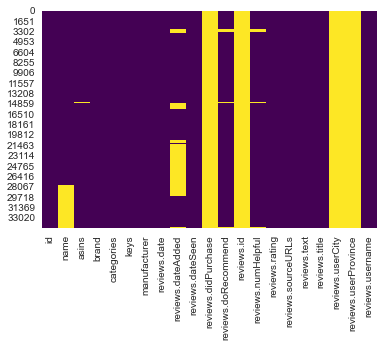

In [49]:
sns.heatmap(df.isnull(),cbar=False,cmap="viridis")

we can remove reviews.userCity,reviews.userProvince,reviews_id 

In [50]:
df.drop(['reviews.id'],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.numHelpful    34131 non-null  float64
 13  reviews.rating        34627 non-null  float64
 14  reviews.sourceURLs    34660 non-null  object 
 15  reviews.text       

In [51]:
df.drop(['reviews.didPurchase'],inplace =True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.doRecommend   34066 non-null  object 
 11  reviews.numHelpful    34131 non-null  float64
 12  reviews.rating        34627 non-null  float64
 13  reviews.sourceURLs    34660 non-null  object 
 14  reviews.text          34659 non-null  object 
 15  reviews.title      

In [52]:
df.describe()

,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,34131.000000,34627.000000,0.0,0.0
mean,0.630248,4.584573,NaN,NaN
std,13.215775,0.735653,NaN,NaN
min,0.000000,1.000000,NaN,NaN
25%,0.000000,4.000000,NaN,NaN
50%,0.000000,5.000000,NaN,NaN
75%,0.000000,5.000000,NaN,NaN
max,814.000000,5.000000,NaN,NaN


Avg review rating =4.58.
Avg review helpful is 0.6 but with high standard deviation so there are people whose reviews are imp and whose are not imp. Reviews lie btw 0-13 people finding helpful. 
Review that was most helful was to 814 people. 

In [53]:
# making a copy for eda where we can drop strings and work on numerical values only
data=df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.doRecommend   34066 non-null  object 
 11  reviews.numHelpful    34131 non-null  float64
 12  reviews.rating        34627 non-null  float64
 13  reviews.sourceURLs    34660 non-null  object 
 14  reviews.text          34659 non-null  object 
 15  reviews.title      

In [54]:
print(data['asins'].unique())
asins_unique=len(data['asins'].unique())
print("Number of Unique asins: "+str(asins_unique))

['B01AHB9CN2' 'B00VINDBJK' 'B005PB2T0S' 'B002Y27P3M' 'B01AHB9CYG'
 'B01AHB9C1E' 'B01J2G4VBG' 'B00ZV9PXP2' 'B0083Q04TA' 'B018Y229OU'
 'B00REQKWGA' 'B00IOYAM4I' 'B018T075DC' nan 'B00DU15MU4' 'B018Y225IA'
 'B005PB2T2Q' 'B018Y23MNM' 'B00OQVZDJM' 'B00IOY8XWQ' 'B00LO29KXQ'
 'B00QJDU3KY' 'B018Y22C2Y' 'B01BFIBRIE' 'B01J4ORNHU' 'B018SZT3BK'
 'B00UH4D8G2' 'B018Y22BI4' 'B00TSUGXKE' 'B00L9EPT8O,B01E6AO69U'
 'B018Y23P7K' 'B00X4WHP5E' 'B00QFQRELG' 'B00LW9XOJM' 'B00QL1ZN3G'
 'B0189XYY0Q' 'B01BH83OOM' 'B00BFJAHF8' 'B00U3FPN4U' 'B002Y27P6Y'
 'B006GWO5NE' 'B006GWO5WK']
Number of Unique asins: 42


unique number of asins means number of different type of products 

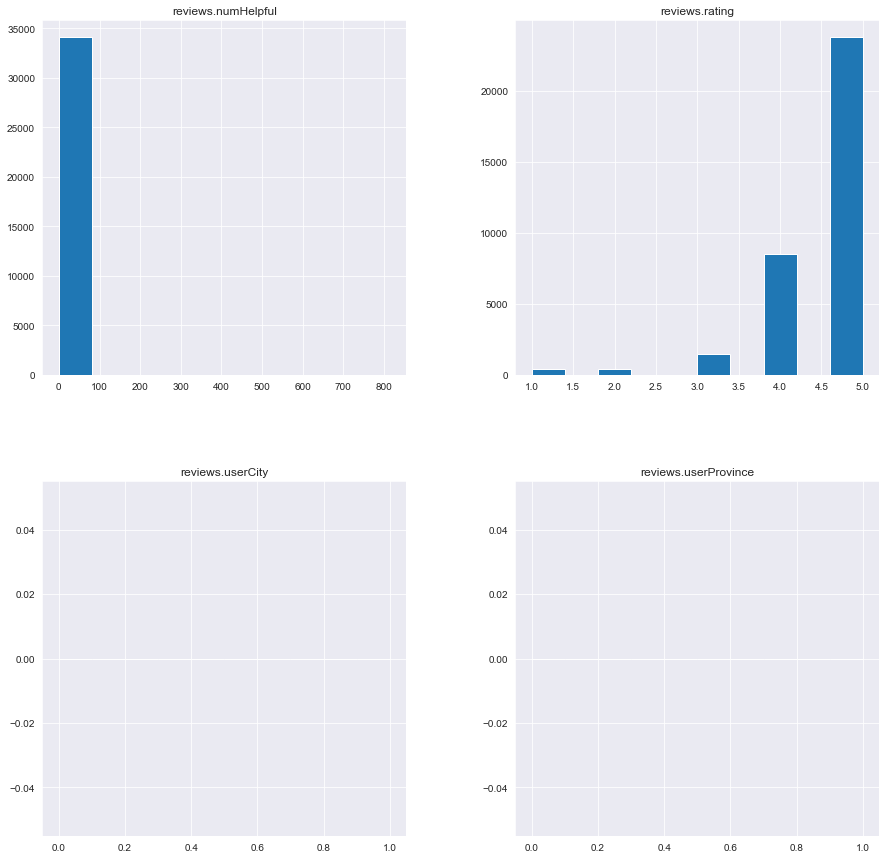

In [55]:
data.hist(figsize=(15,15))
plt.show()

reviews.numHelpful: Outliers in this case are valuable, so we may want to weight reviews that had more than 50+ people who find them helpful. reviews.rating: Majority of examples were rated highly (looking at rating distribution). There is twice amount of 5 star ratings than the others ratings combined so problem arises when we train it with only high rating so it won't give proper result in negative rating. So we use stratified shuffle split 

# Train test split with stratified shuffle

In [56]:
from sklearn.model_selection import StratifiedShuffleSplit
# so in this stratified shuffle split , the data is shuffled everytime after a split 
# so now no one type of data will be there in training dataset which makes it well trained for differnet datasets
print("Before {}".format(len(data)))
# now removing all null values from review.rating
data_after=data.dropna(subset=['reviews.rating'])
print("After {}".format(len(data_after)))
data_after['reviews.rating']=data_after['reviews.rating'].astype(int)

Before 34660
After 34627


we use this split when our dataset is too biased to one section so to balance it we shuffle it after every insertion of datapoint 

In [57]:
split=StratifiedShuffleSplit(n_splits=5,test_size=0.2)
for train_index,test_index in split.split(data_after,data_after["reviews.rating"]):
    strat_train=data_after.reindex(train_index)
    strat_test=data_after.reindex(test_index)
strat_train.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
9328,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-31T00:00:00.000Z,2017-05-21T01:38:59Z,"2017-04-30T00:12:00.000Z,2017-06-07T08:17:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,I have an Amazon Kindle and this one. The kind...,I really like this version,NaN,NaN,review1
20761,AVphPmHuilAPnD_x3E5h,"Kindle Voyage E-reader, 6 High-Resolution Disp...",B00IOY8XWQ,Amazon,"Walmart for Business,Office Electronics,Tablet...","848719040104,kindlevoyageereader6highresolutio...",Amazon,2015-04-03T00:00:00.000Z,NaN,"2017-08-31T00:00:00Z,2017-03-31T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/9302088/review...,Out of the box there really is nothing to do b...,Easy to set up and use,NaN,NaN,JQR5
30053,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2016-07-09T00:00:00.000Z,2017-09-20T05:35:59Z,"2017-08-25T22:40:32.187Z,2017-08-19T09:25:25.7...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4370400/review...,This is the 5th or 6th Fire TV I have purchase...,Great Product. Best box for streaming and games,NaN,NaN,lilokster
17376,AVqVGWLKnnc1JgDc3jF1,Amazon Kindle Paperwhite - eBook reader - 4 GB...,B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",firekidseditiontablet7displaywifi16gbgreenkidp...,Amazon,2017-01-23T00:00:00.000Z,2017-06-21T07:38:51Z,"2017-06-04T02:18:16.153Z,2017-06-03T18:42:28.609Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5026300/review...,We got this for our nephew and he absolutely l...,I got this for a gift,NaN,NaN,Brad
33215,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2016-10-21T00:00:00.000Z,2017-09-20T05:35:53Z,"2017-08-25T22:04:47.324Z,2017-08-19T09:35:26.5...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4370400/review...,Great device to use for streaming tv shows & m...,Great Fire TV,NaN,NaN,Myprinter


So here we can see that we get randomised row in our training dataset by using stratified shuffle split

In [58]:
len(strat_train)

27701

In [59]:
len(strat_test)

6926

In [60]:
strat_train["reviews.rating"].value_counts()/len(strat_train)
# this is to get percentage of each of the ratings 

5.0    0.688603
4.0    0.243962
3.0    0.043139
2.0    0.011732
1.0    0.011660
Name: reviews.rating, dtype: float64

In [61]:
strat_test["reviews.rating"].value_counts()/len(strat_test)
# this is to get percentage of each of the ratings 

5.0    0.676148
4.0    0.257003
3.0    0.043604
1.0    0.011118
2.0    0.010973
Name: reviews.rating, dtype: float64

so stratified shuffle split helps in giving more appropriate answers as what if it is arranged in some way that 1* max rating comes in strat_train . so it helps in avg in out

# Data Exploration(training set)

In [62]:
reviews=strat_train.copy()
reviews.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
9328,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-31T00:00:00.000Z,2017-05-21T01:38:59Z,"2017-04-30T00:12:00.000Z,2017-06-07T08:17:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,I have an Amazon Kindle and this one. The kind...,I really like this version,NaN,NaN,review1
20761,AVphPmHuilAPnD_x3E5h,"Kindle Voyage E-reader, 6 High-Resolution Disp...",B00IOY8XWQ,Amazon,"Walmart for Business,Office Electronics,Tablet...","848719040104,kindlevoyageereader6highresolutio...",Amazon,2015-04-03T00:00:00.000Z,NaN,"2017-08-31T00:00:00Z,2017-03-31T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/9302088/review...,Out of the box there really is nothing to do b...,Easy to set up and use,NaN,NaN,JQR5


In [63]:
len(reviews['name'].unique()),len(reviews['asins'].unique())

(49, 36)

so we have 35 products in training data ASINs but more product names 48

so we have one to many relationship btw asins and names. A single asin can have different name due to different seller

In [64]:
# so its better to group by on the basis of asins
reviews.groupby('asins')['name'].unique()

asins
B005PB2T0S               [Kindle Keyboard,,,\r\nKindle Keyboard,,,, Ama...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B00DU15MU4               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00IOY8XWQ               [Kindle Voyage E-reader, 6 High-Resolution Dis...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [Echo (White),,,\r\nEcho (White),,,, Amazon Fi...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM                                                           [nan]
B00OQVZDJM               [Amazon Kindle Paperwhite - eBook reader - 4 G...
B00QFQRELG                                                           [nan]
B00QJDU3KY               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00QL1ZN3G                                                           [nan]
B00REQKWGA               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00TSUGXKE         

we are concerned with product ratings and reviews so we take care of asins only

In [65]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 9328 to 4504
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27676 non-null  object 
 1   name                  22287 non-null  object 
 2   asins                 27674 non-null  object 
 3   brand                 27676 non-null  object 
 4   categories            27676 non-null  object 
 5   keys                  27676 non-null  object 
 6   manufacturer          27676 non-null  object 
 7   reviews.date          27654 non-null  object 
 8   reviews.dateAdded     19221 non-null  object 
 9   reviews.dateSeen      27676 non-null  object 
 10  reviews.doRecommend   27255 non-null  object 
 11  reviews.numHelpful    27306 non-null  float64
 12  reviews.rating        27676 non-null  float64
 13  reviews.sourceURLs    27676 non-null  object 
 14  reviews.text          27675 non-null  object 
 15  reviews.title    

# Asins/Names with ratings

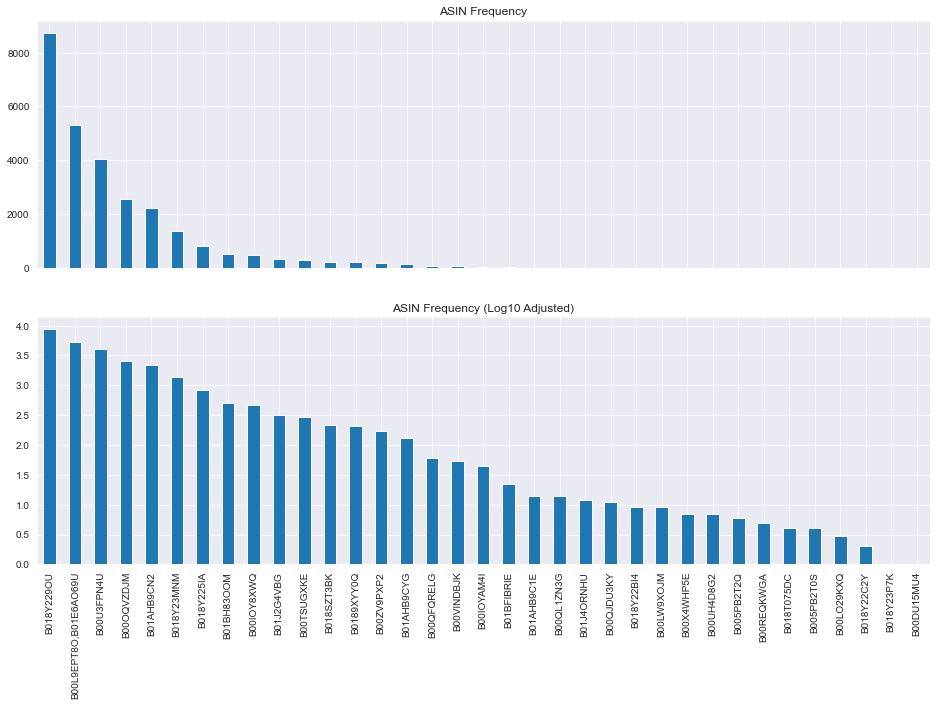

In [66]:
fig = plt.figure(figsize=(16,10))
# we use subplot when we have to see interrelationship btw two graphs
ax1 = plt.subplot(2,1,1)
# this 2,1,1 is 2nd row 1st column 1st plot 
ax2 = plt.subplot(2,1,2, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
# The ax (or Axes object) is the area of the figure where your data appears
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2, 
                                               title="ASIN Frequency (Log10 Adjusted)") 
# np.log10 normalises our data to visualize it better 
plt.show()

so we know that what asins have max number of people rating . And this answers which asins have most sales 

# ASINS/Reviews

In [67]:
reviews['reviews.rating'].mean()
# trianing data set rating mean

4.58754877872525

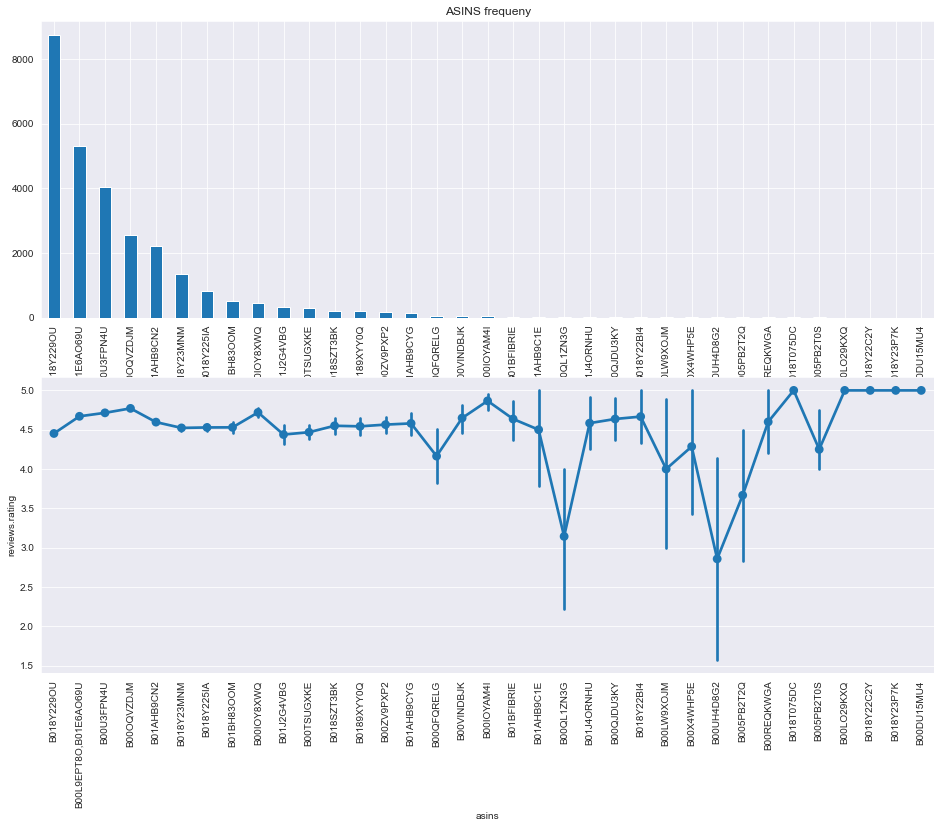

In [68]:
# now we will use pointplot to see our number of those people giving ratings
asins_count=reviews['asins'].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews['asins'].value_counts().plot(kind="bar",title="ASINS frequeny")
plt.subplot(2,1,2)
sns.pointplot(x="asins",y="reviews.rating",order=asins_count,data=reviews)
plt.xticks(rotation=90)
plt.show()

so we have info about rating of product and no. of reviews given on that asin.Here dots are means and lines extremes show max min rating value.So now we can do analysis of products quality using no. of users

# reviews.doRecommend/ASINs

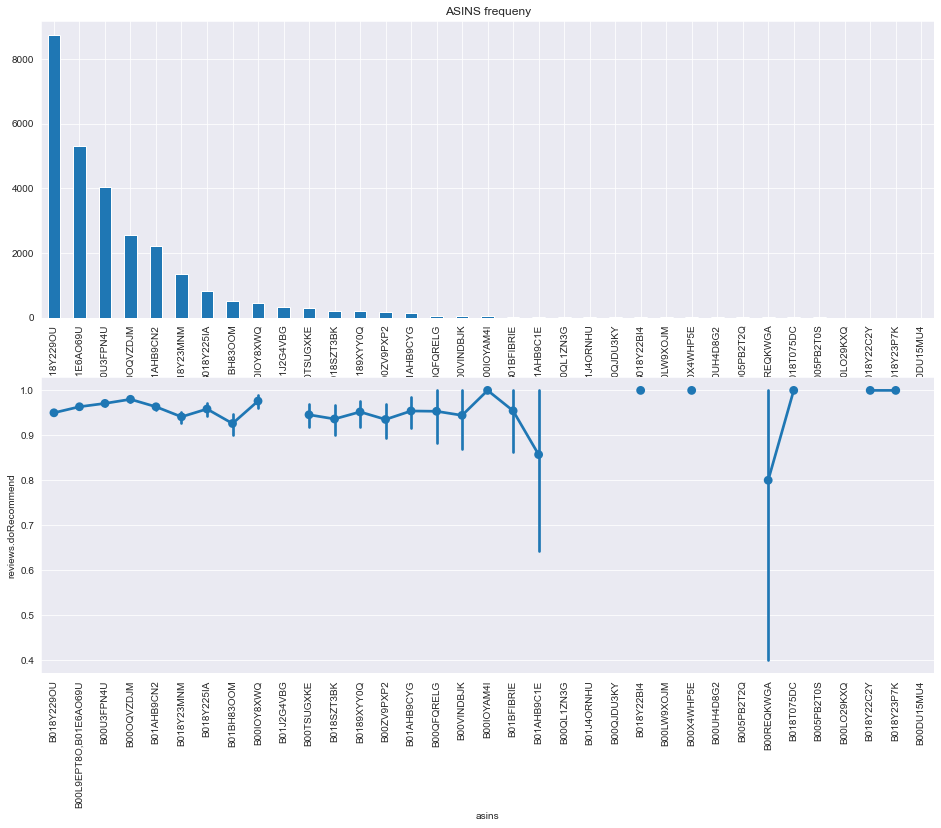

In [69]:
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews['asins'].value_counts().plot(kind="bar",title="ASINS frequeny")
plt.subplot(2,1,2)
sns.pointplot(x="asins",y="reviews.doRecommend",order=asins_count,data=reviews)
plt.xticks(rotation=90)
plt.show()

Info about which product is more frequently recommended and if its sold more or not based on that recommendation

# Correlations

In [70]:
corr_matrix=reviews.corr()
corr_matrix

,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
reviews.numHelpful,1.000000,-0.043007,NaN,NaN
reviews.rating,-0.043007,1.000000,NaN,NaN
reviews.userCity,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN


In [71]:
counts=reviews['asins'].value_counts().to_frame()
avg_rating=reviews.groupby("asins")['reviews.rating'].mean().to_frame()
avg_rating

,reviews.rating
asins,
B005PB2T0S,4.250000
B005PB2T2Q,3.666667
B00DU15MU4,5.000000
B00IOY8XWQ,4.719828
B00IOYAM4I,4.866667
"B00L9EPT8O,B01E6AO69U",4.670433
B00LO29KXQ,5.000000
B00LW9XOJM,4.000000
B00OQVZDJM,4.771206


Id's and mean of the product belonging to that id

In [72]:
table=avg_rating.join(counts)
table

,reviews.rating,asins
asins,,
B005PB2T0S,4.250000,4
B005PB2T2Q,3.666667,6
B00DU15MU4,5.000000,1
B00IOY8XWQ,4.719828,464
B00IOYAM4I,4.866667,45
"B00L9EPT8O,B01E6AO69U",4.670433,5310
B00LO29KXQ,5.000000,3
B00LW9XOJM,4.000000,9
B00OQVZDJM,4.771206,2570


,reviews.rating,asins
reviews.rating,1.000000,0.092706
asins,0.092706,1.000000


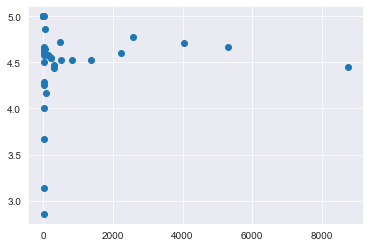

In [73]:
plt.scatter("asins","reviews.rating",data=table)
table.corr()

# Sentiment Analysis

In [74]:
def sentiments(rating):
    if(rating==5)or(rating==4):
        return "Positive"
    elif rating==3:
        return "Neutral"
    elif(rating==2)or(rating==1):
        return "Negative"


In [87]:
# now adding this sentiments function to training and testing dataset
strat_train['Sentiments']=strat_train['reviews.rating'].apply(sentiments)
strat_test['Sentiments']=strat_test['reviews.rating'].apply(sentiments)
# strat_train.head()
strat_train["Sentiments"][:20]

9328     Positive
20761    Positive
30053    Positive
17376    Positive
33215    Positive
4728     Positive
29299    Positive
13777    Positive
29961    Positive
2843      Neutral
23010    Positive
22756    Positive
24307    Positive
8773     Negative
27279     Neutral
19531    Positive
15038    Positive
15807    Positive
945      Positive
9785     Positive
Name: Sentiments, dtype: object

# Preparing text data 

In [76]:
x_train=strat_train['reviews.text']
x_train_targetsentiment=strat_train['Sentiments']
x_test=strat_test['reviews.text']
x_test_targetsentiment=strat_test['Sentiments']
print(len(x_train),len(x_test))

27701 6926


# Extracting features

In [77]:

# tokenisation: which breaks sentences into words
# stopwords: filtering unwanted words like the ,are etc.
# filling na with space 
x_train=x_train.fillna(' ')
x_test=x_test.fillna(' ')
x_train_targetsentiment=x_train_targetsentiment.fillna(' ')
x_test_targetsentiment=x_test_targetsentiment.fillna(' ')

In [78]:
# Text preprocessing and occurence counting using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
x_train_counts=count_vect.fit_transform(x_train)
x_train_counts.shape

(27701, 12551)

here we have 27k samples and 12k distinct words

In [79]:
from sklearn.feature_extraction.text import TfidfTransformer
tfid_transformer=TfidfTransformer(use_idf=False)
x_train_tfid=tfid_transformer.fit_transform(x_train_counts)
x_train_tfid.shape

(27701, 12551)

so tfidf transformer reduces less meaning words which have higher occurence . So it divides the number of occurences for each word by total number of words. Downscales stop words like "the" "are" etc.

In [80]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe=Pipeline([('vect',CountVectorizer()),
                               ("tfidf",TfidfTransformer()),
                               ("clf_nominalNB",MultinomialNB())])
clf_multiNB_pipe.fit(x_train,x_train_targetsentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

we use pipeline from sklearn when we want a number of tasks to be implemented on every datapoint

In [81]:
predict_multiNB=clf_multiNB_pipe.predict(x_test)
predict_multiNB

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [82]:
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(x_test_targetsentiment,predict_multiNB)))

Accuracy: 0.9330060641062663


We have attained accuracy of 94% on our testing data . 

In [83]:
x_test

13254    I love this thing!!!!!So much better then my n...
1926     I gave this Amazon Fire HD8 as a retirement gi...
18648    Wife loves this Kindle as opposed to some of t...
29180    This is one of the coolest new inventions arou...
29548    My Echo hasn't updated to the latest version t...
                               ...                        
24812    This is my second one. The first one I bought ...
24351    Worth having in the home. Also compatible with...
28281    Spiffy toy and ad they add more items to contr...
33129    I'm able to screen mirror from my tablet and a...
12633    Bought these for my 3 college students. They l...
Name: reviews.text, Length: 6926, dtype: object

# Applying model on input text

In [89]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), 
                               ("tfidf", TfidfTransformer()),
                               ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(x_train, x_train_targetsentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(x_test)
print('Accuracy: {}'. format(accuracy_score(x_test_targetsentiment, 
                             predictedLinearSVC)))

Accuracy: 0.9358937337568582


In [93]:
new_text=["the tablet is good , really liked it",
         "the tablet is ok,it's working",
         "The tablet is not good, does not work waste"]
clf_linearSVC_pipe.predict(new_text)

array(['Positive', 'Neutral', 'Negative'], dtype=object)